<a href="https://colab.research.google.com/github/Kowshiknandha/GUVI-FINAL-PROJECTS/blob/main/ITEM_DEMAND_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ITEM DEMAND FORCASTING FOR 3 MONTHS.**

**AIM:**

**This model was analysing the 5 years of sales of 50+ items in 10+ different  shops at every day .It will be find the demand of next three months of items.** 

1.Data cleaning.  

2.EDA for dataset

3.Splitting of data

4.Scaling of the data

5.Build the model

  A.Linear regression algorithm

  B.KNN regressor algorithm

  C.Decision tree regressor algorithm

  D.Random forest regressor algorithm

  E.xgboost algorithm

  F.Voting regressor algorithm  

6.Evaluate the all models


**Data Cleaning**

In [53]:
# import all neccessary libraries for data reading, cleaning and EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [54]:
df=pd.read_csv('train 2.csv')               
print('Shape of Raw dataset :', df.shape)   
     

Shape of Raw dataset : (913000, 4)


In [55]:
df=df.drop_duplicates()
print('Shape of  Dataframe after remove duplicates :',df.shape)

Shape of  Dataframe after remove duplicates : (913000, 4)


**NO Duplicates are presents in the dataset**

In [56]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [57]:
df.info()                              

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 34.8+ MB


**Datatype of date column is not meaningful.So it will change into "datetime" datatype.**

In [58]:
df['date']=pd.to_datetime(df['date']) # change the datatype of date column
df=df.sort_values(by=['date','item']) # dataset is changing into ascending order with respect to date
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1826,2013-01-01,2,1,12
3652,2013-01-01,3,1,19
5478,2013-01-01,4,1,10
7304,2013-01-01,5,1,11


In [59]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [60]:
#df=df.drop('store',axis=1)

In [61]:
df=pd.DataFrame(df.groupby(['date','item'])['sales'].sum())
df.reset_index(inplace=True)
df

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


In [62]:
df['end_date']=df['date']+pd.DateOffset(months=+3)

In [63]:
df['duration']=(df['end_date']-df['date']).dt.days
df

,date,item,sales,end_date,duration
0,2013-01-01,1,133,2013-04-01,90
1,2013-01-01,2,327,2013-04-01,90
2,2013-01-01,3,172,2013-04-01,90
3,2013-01-01,4,102,2013-04-01,90
4,2013-01-01,5,83,2013-04-01,90
...,...,...,...,...,...
91295,2017-12-31,46,605,2018-03-31,90
91296,2017-12-31,47,211,2018-03-31,90
91297,2017-12-31,48,494,2018-03-31,90
91298,2017-12-31,49,285,2018-03-31,90


In [64]:
items_df=[]                                     # A whole dataframe split into multiple dataframe with respect to items
for i in range(1,51):
  items_df.append(df.loc[df['item']==i])
items_df[1]                                     # Every item have unique dataframe
  

,date,item,sales,end_date,duration
1,2013-01-01,2,327,2013-04-01,90
51,2013-01-02,2,279,2013-04-02,90
101,2013-01-03,2,304,2013-04-03,90
151,2013-01-04,2,359,2013-04-04,90
201,2013-01-05,2,377,2013-04-05,90
...,...,...,...,...,...
91051,2017-12-27,2,500,2018-03-27,90
91101,2017-12-28,2,495,2018-03-28,90
91151,2017-12-29,2,515,2018-03-29,90
91201,2017-12-30,2,538,2018-03-30,90


In [65]:
items_df[5].head()

,date,item,sales,end_date,duration
5,2013-01-01,6,288,2013-04-01,90
55,2013-01-02,6,310,2013-04-02,90
105,2013-01-03,6,309,2013-04-03,90
155,2013-01-04,6,343,2013-04-04,90
205,2013-01-05,6,343,2013-04-05,90


In [66]:
def three_month_sales(data):
  three=[]
  for i in range(0,len(data)):
    sum=data['sales'][i:i+data.iloc[i,4]].sum()
    three.append(sum)

  data['three_month_sale']=three
  data.drop(data.tail(91).index,inplace=True)
  return data

In [67]:
dataset=[three_month_sales(items_df[k]) for k in range(50)]

In [68]:
dataset[0]

,date,item,sales,end_date,duration,three_month_sale
0,2013-01-01,1,133,2013-04-01,90,12847
50,2013-01-02,1,99,2013-04-02,90,12848
100,2013-01-03,1,127,2013-04-03,90,12936
150,2013-01-04,1,145,2013-04-04,90,13019
200,2013-01-05,1,149,2013-04-05,90,13103
...,...,...,...,...,...,...
86500,2017-09-27,1,249,2017-12-27,91,21126
86550,2017-09-28,1,235,2017-12-28,91,21031
86600,2017-09-29,1,270,2017-12-29,91,20974
86650,2017-09-30,1,269,2017-12-30,91,20911


In [69]:
def delete(df,unwanted):                          # delete the unwanted columns         
  df.drop(unwanted,axis=1,inplace=True)
  return df
unwanted_col=['end_date','sales']                    
dataset=[delete(dataset[i],unwanted_col) for i in range(50)]             # One day sales ware converted into three month sales both of them gives same informations.
dataset[49]

,date,item,duration,three_month_sale
49,2013-01-01,50,90,38720
99,2013-01-02,50,90,38874
149,2013-01-03,50,90,39034
199,2013-01-04,50,90,39200
249,2013-01-05,50,90,39378
...,...,...,...,...
86549,2017-09-27,50,91,63158
86599,2017-09-28,50,91,62942
86649,2017-09-29,50,91,62787
86699,2017-09-30,50,91,62558


In [70]:
def dataframe(data):
  df=data[0]
  for i in range(1,50):
    df=df.append(data[i],ignore_index=True)
  return df

In [91]:
df=dataframe(dataset)
df

,date,item,duration,three_month_sale
0,2013-01-01,1,90,12847
1,2013-01-02,1,90,12848
2,2013-01-03,1,90,12936
3,2013-01-04,1,90,13019
4,2013-01-05,1,90,13103
...,...,...,...,...
86745,2017-09-27,50,91,63158
86746,2017-09-28,50,91,62942
86747,2017-09-29,50,91,62787
86748,2017-09-30,50,91,62558


In [72]:
def isweekend(data):
  if data < 5 :
    return 0
  else:
    return 1
     

In [73]:
df['day']=df['date'].dt.day
df['dayofyear']=df['date'].dt.dayofyear
df['week']=df['date'].dt.week
df['weekday']=df['date'].dt.weekday
df['weekend']=[isweekend(i) for i in df['weekday']]
df['month']=df['date'].dt.month
df['quarter']=df['date'].dt.quarter
df['year']=df['date'].dt.year


In [74]:
df

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013
1,2013-01-02,1,90,12848,2,2,1,2,0,1,1,2013
2,2013-01-03,1,90,12936,3,3,1,3,0,1,1,2013
3,2013-01-04,1,90,13019,4,4,1,4,0,1,1,2013
4,2013-01-05,1,90,13103,5,5,1,5,1,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
86745,2017-09-27,50,91,63158,27,270,39,2,0,9,3,2017
86746,2017-09-28,50,91,62942,28,271,39,3,0,9,3,2017
86747,2017-09-29,50,91,62787,29,272,39,4,0,9,3,2017
86748,2017-09-30,50,91,62558,30,273,39,5,1,9,3,2017


**2. EDA of dataset**

In [75]:
def EDA (data, cat_feature,num_feature,target,item):
  data=data[data['item']==item]
  # histogram for continuous variables
  for i in num_feature:
    fig,axes=plt.subplots(1,1,sharex=False,figsize=(15,10))
    fig.suptitle(f'histogram of column {i}')
    sns.barplot(x=i,data=data,y=target,palette='Set2')
    plt.show()
    

  #scatter plot for contious varibles
  plt.figure(figsize=(15, 10))
  for i in num_feature:  
    sns.scatterplot(data=data,x=i,y=target)
  plt.show()

  for i in cat_feature:
    plt.figure(figsize=(15, 10))
    fig.suptitle(f'counting of column {i}')
    data.groupby(i)[target].mean().sort_values().plot(kind='barh')
    plt.show()

  #correlation heatmap
  plt.figure(figsize=(15, 10))
  sns.heatmap(data.corr(),cmap='RdBu_r',annot=True)
  plt.show()

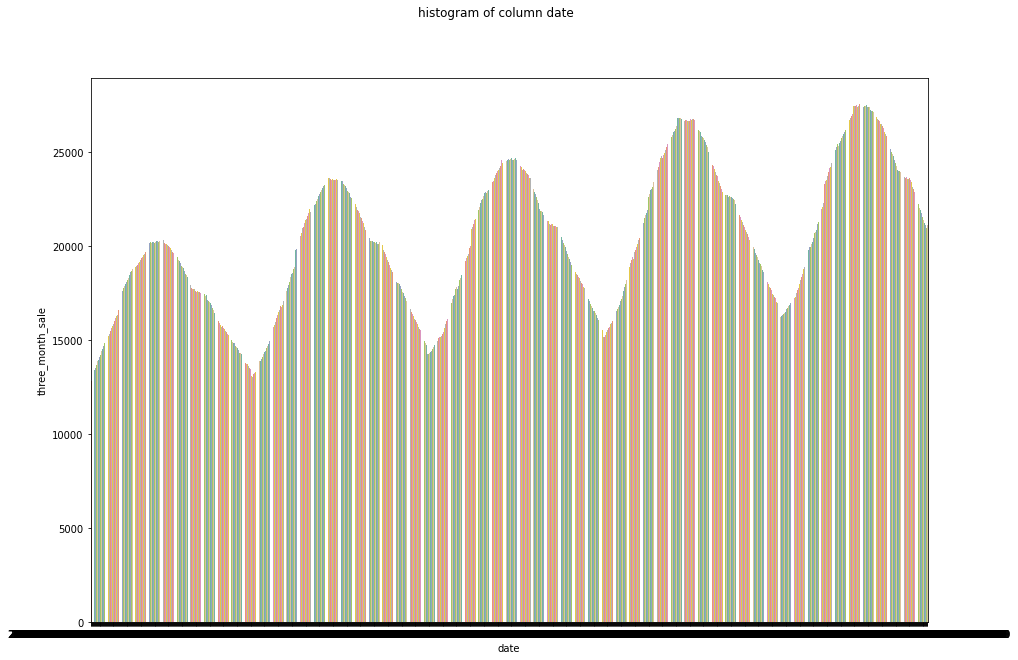

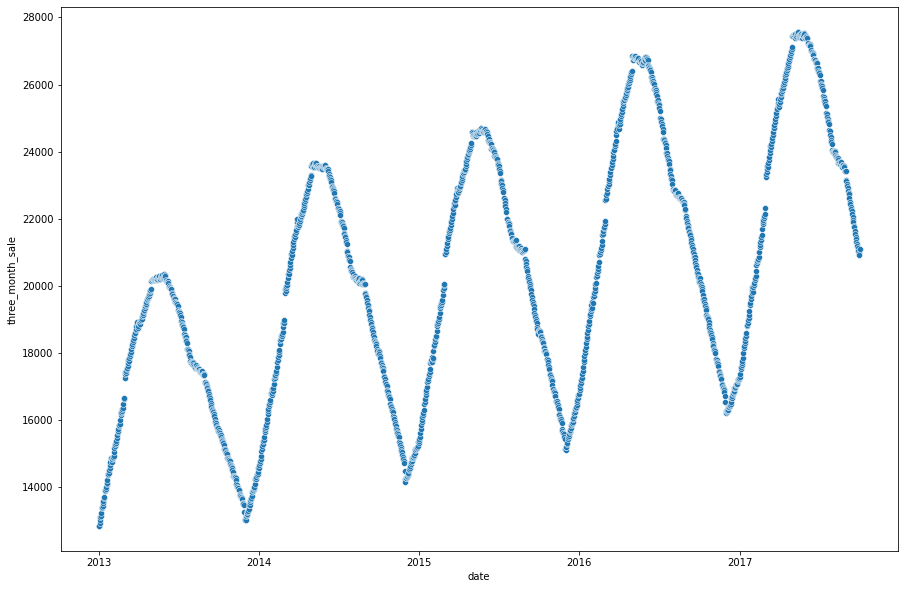

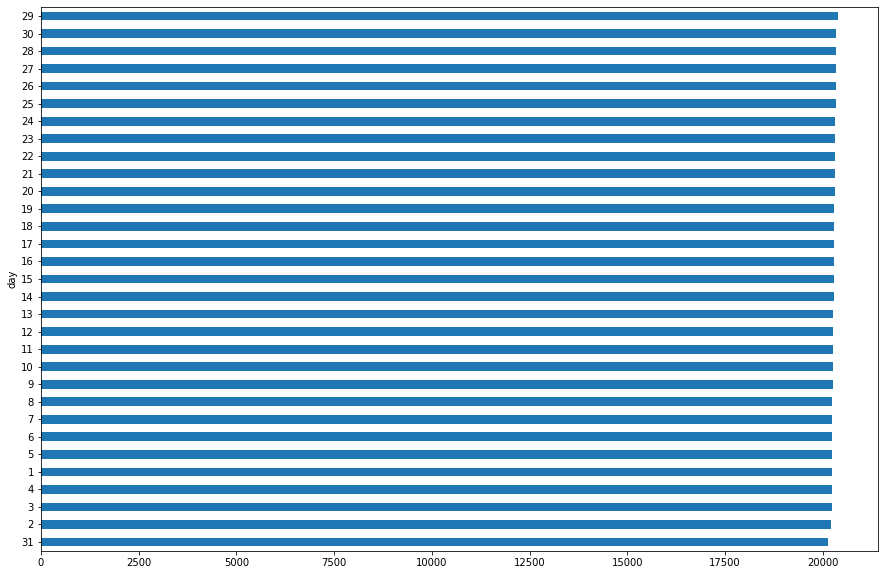

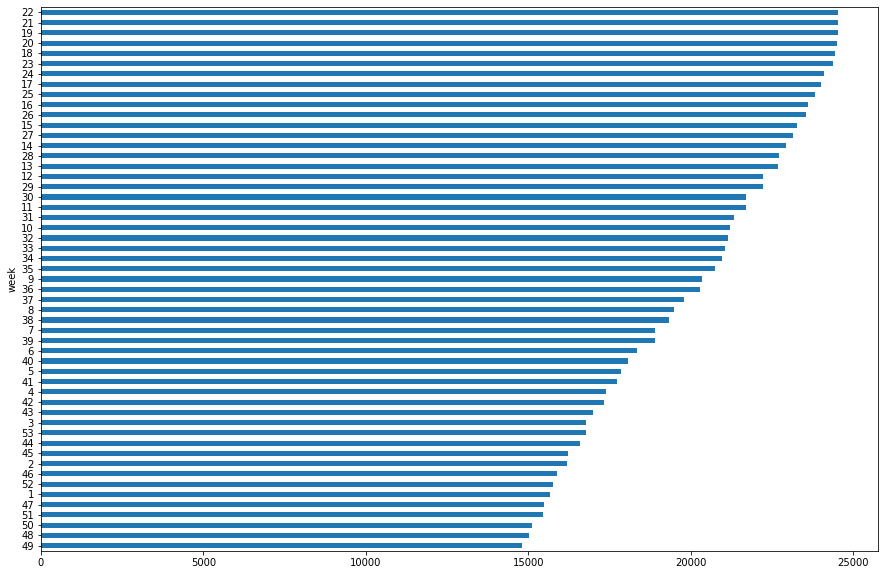

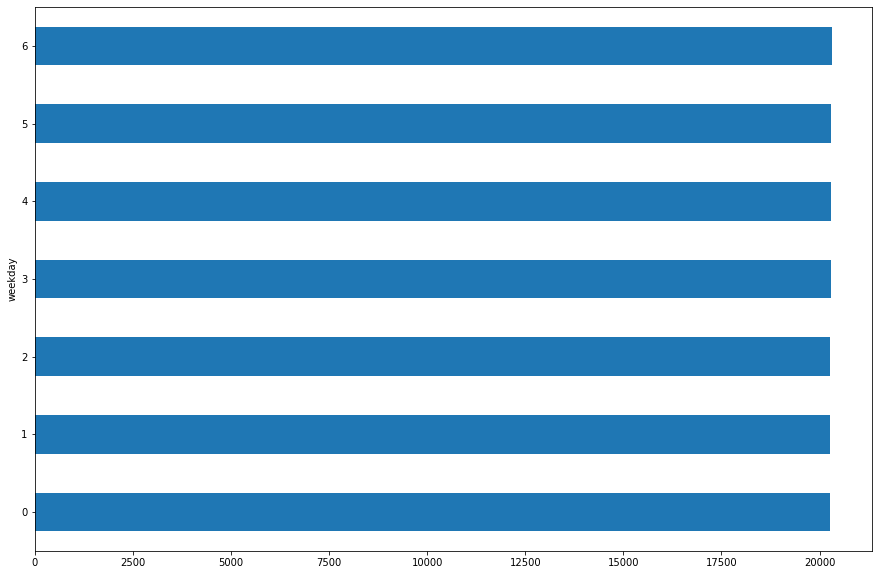

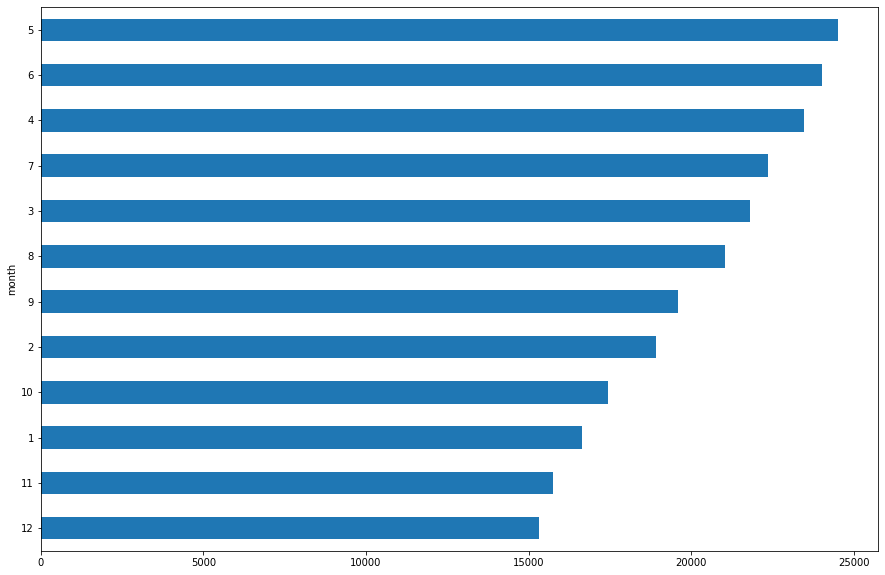

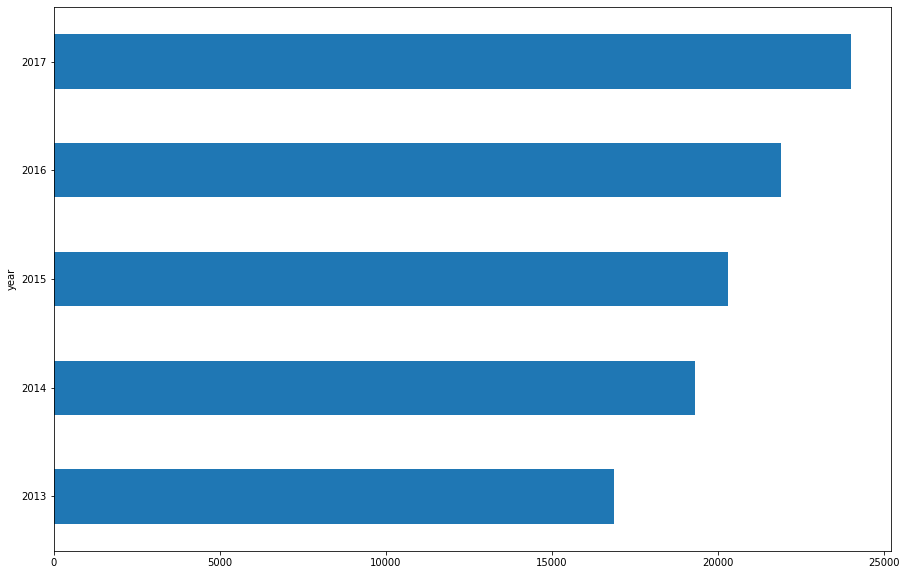

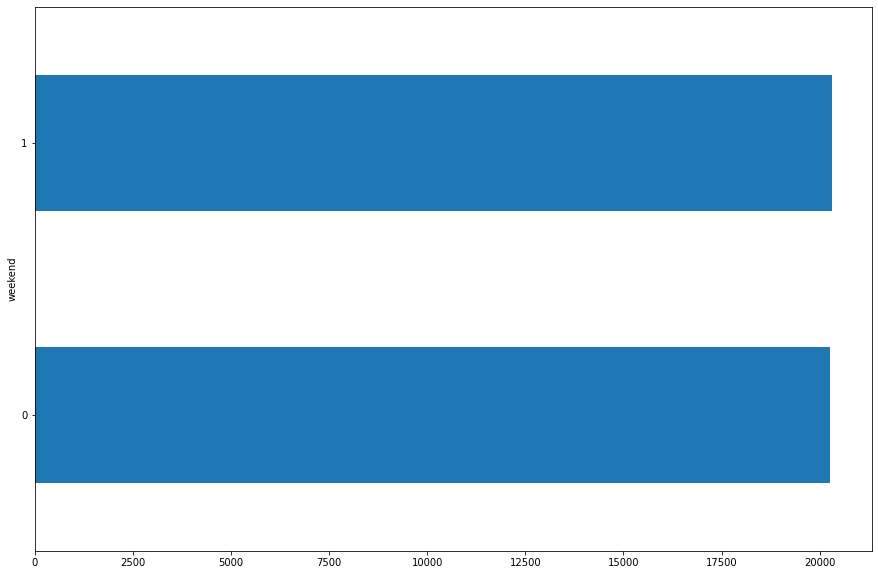

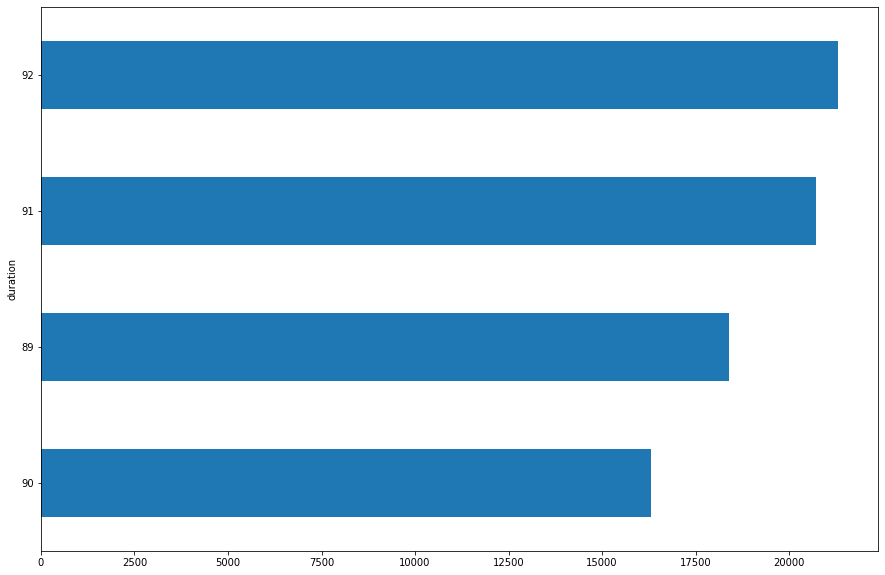

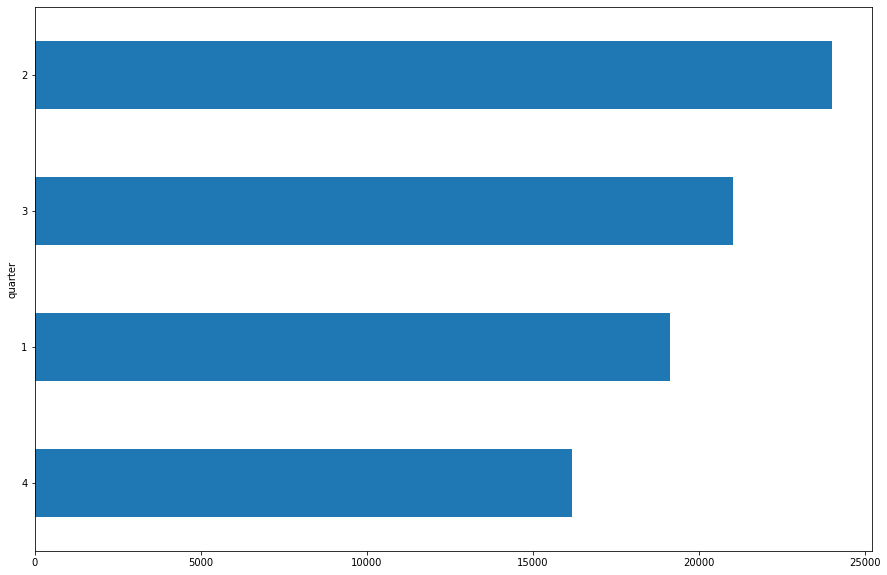

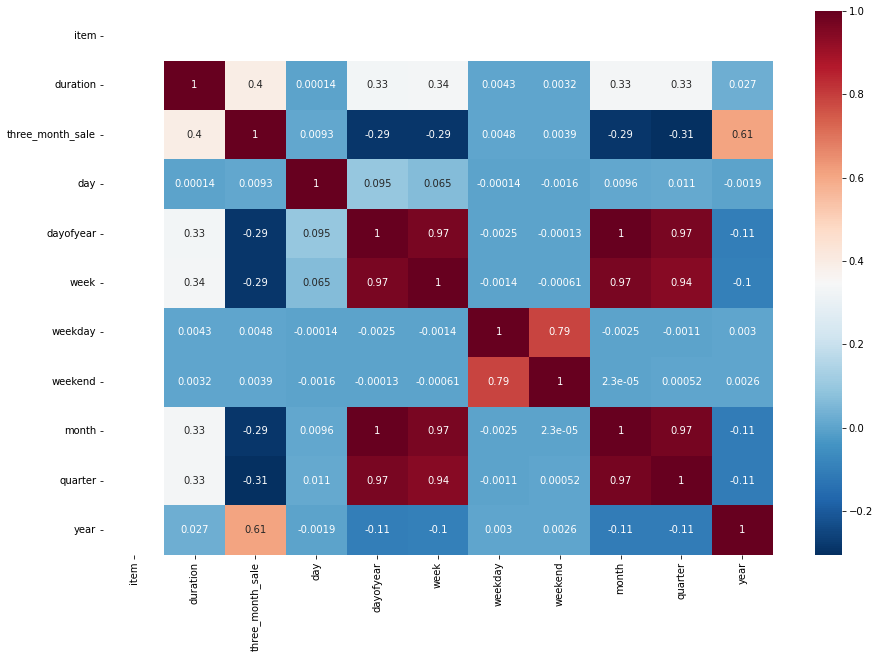

In [76]:
num_features=['date']
cat_features=['day','week','weekday','month','year','weekend','duration','quarter']
EDA(df,cat_features,num_features,'three_month_sale',1)

**3. Splitting the data**

In [77]:
df=df.sort_values(by=['date','item'])

In [78]:
df

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013
1735,2013-01-01,2,90,34650,1,1,1,1,0,1,1,2013
3470,2013-01-01,3,90,21420,1,1,1,1,0,1,1,2013
5205,2013-01-01,4,90,12884,1,1,1,1,0,1,1,2013
6940,2013-01-01,5,90,10630,1,1,1,1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
79809,2017-10-01,46,92,56785,1,274,39,6,1,10,4,2017
81544,2017-10-01,47,92,21132,1,274,39,6,1,10,4,2017
83279,2017-10-01,48,92,49695,1,274,39,6,1,10,4,2017
85014,2017-10-01,49,92,27934,1,274,39,6,1,10,4,2017


In [79]:
#unwanted_col=['day','week','weekday','weekend']                    
#df=delete(df,unwanted_col)                # One day sales ware converted into three month sales both of them gives same informations.
#df

In [80]:
split_date=pd.to_datetime('24-07-2016')
X_train=df[df['date']==split_date].drop(['three_month_sale','date','weekend'],axis=1).values
y_train=df[df['date']==split_date].drop(['dayofyear','month','year','item','date','duration','day','week','weekday','weekend','quarter'],axis=1).values
     


In [81]:
split_date

Timestamp('2016-07-24 00:00:00')

In [82]:
y_train=y_train.flatten()
y_test=y_test.flatten()

**4. Scaling the data**

In [83]:
def scaling(train,test):                               # scaling the data for important for KNN,voting regressor 
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  #for ix,i in enumerate(features):
  scaler=scaler.fit(train)
  X_train_scale=scaler.transform(train)
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

In [84]:
X_test

array([[   1,   92,   24, ...,    7,    3, 2016],
       [   2,   92,   24, ...,    7,    3, 2016],
       [   3,   92,   24, ...,    7,    3, 2016],
       ...,
       [  48,   92,    1, ...,   10,    4, 2017],
       [  49,   92,    1, ...,   10,    4, 2017],
       [  50,   92,    1, ...,   10,    4, 2017]])

In [85]:
y_test

array([23645, 63295, 39317, ..., 49695, 27934, 62925])

In [86]:
X_train_scale,X_test_scale=scaling(X_train,X_test)
print(X_train_scale.shape,X_test_scale.shape)

(50, 9) (21750, 9)


**5. Build the model**

In [87]:
from sklearn.linear_model import LinearRegression   # for linear regression
from sklearn.neighbors import KNeighborsRegressor   # for KNN regression
from sklearn.tree import DecisionTreeRegressor      # for Decision tree regression
from sklearn.ensemble import RandomForestRegressor  # for Random Forest regression
import xgboost 
from xgboost import XGBRegressor                    # for XGBoost regression
from sklearn.ensemble import VotingRegressor        # for voting regressoin

In [88]:
def algorithm (model,X_train, X_test, y_train, y_test,k):    # definition of model building for all models
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  mod=model
  mod.fit(X_train, y_train)                                  # fit the training set into the model
  y_predict_mod=mod.predict(X_test)                          # predict the result testing set
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod}) # dataframe of actual and predicted
  score=mod.score(X_test,y_test)                             # score of prediction
  MAE=mean_absolute_error(y_test,y_predict_mod)              # squared error of prediction
  print('for ' ,k ,' value ',"Train Accuracy : ",round(mod.score(X_train,y_train),3),"Val Accuracy :" ,round(np.mean(cross_val_score_time(mod, X_train, y_train)),3))
  return y_predict_mod,result,score,mod,MAE

In [89]:
def cross_val_score_time(mod,X_train,y_train):
  from sklearn.model_selection import TimeSeriesSplit
  from sklearn.metrics import r2_score
  tscv = TimeSeriesSplit(n_splits=3)
  scores=[]
  for i in tscv.split(X_train):
    X_tr,X_te=pd.DataFrame(list(map(X_train.__getitem__,i[0]))),pd.DataFrame(list(map(X_train.__getitem__,i[1])))
    y_tr,y_te=pd.Series(list(map(y_train.__getitem__,i[0]))),pd.Series(list(map(y_train.__getitem__,i[1])))
    X_tr=X_tr.values
    X_te=X_te.values
    y_tr=y_tr.values
    y_te=y_te.values
    #print(X_tr.shape)
    #print(X_te.shape)
    mod.fit(X_tr,y_tr)
    pred=mod.predict(X_te)
    sco=r2_score(y_te,pred)
    scores.append(sco)
  return scores

A) Linear Regression algorithm

In [90]:
y_predict_lr,result_L,score_L,lin,MAE_L=algorithm(LinearRegression(),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_L.head())
print('MAE error of linear regeression is ' ,MAE_L)
print(' Score of LinearRegression algorithmn is ', score_L * 100)

for  1  value  Train Accuracy :  0.006 Val Accuracy : -2.003
   actual       predict
0   23645  59425.934118
1   63295  59304.678031
2   39317  59183.421945
3   23722  59062.165858
4   19776  58940.909772
MAE error of linear regeression is  20068.814368596544
 Score of LinearRegression algorithmn is  -1.3281570708200574


In [92]:
for i in range (1,10):
  algorithm(KNeighborsRegressor(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  2  value  Train Accuracy :  0.518 Val Accuracy : -0.371
for  3  value  Train Accuracy :  0.275 Val Accuracy : -0.604
for  4  value  Train Accuracy :  0.119 Val Accuracy : -0.579
for  5  value  Train Accuracy :  0.137 Val Accuracy : -0.351
for  6  value  Train Accuracy :  0.231 Val Accuracy : -0.337
for  7  value  Train Accuracy :  0.216 Val Accuracy : -0.3
for  8  value  Train Accuracy :  0.176 Val Accuracy : -0.286
for  9  value  Train Accuracy :  0.176 Val Accuracy : -0.224


In [93]:
y_predict_knn,result_K,score_K,knn,MAE_K=algorithm(KNeighborsRegressor(1),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_K.tail())
print('MAE error of knn regeression is ' , MAE_K)
print(' Score of KNN Regression algorithmn is ', score_K * 100)

for  1  value  Train Accuracy :  1.0 Val Accuracy : -1.519
       actual  predict
21745   56785  63330.0
21746   21132  23712.0
21747   49695  55484.0
21748   27934  31590.0
21749   62925  71525.0
MAE error of knn regeression is  7070.725885057472
 Score of KNN Regression algorithmn is  84.02128517696642


**C)Decision Tree Regression model**

In [94]:
for i in range(1,25):
  algorithm(DecisionTreeRegressor(max_depth=i,random_state=97),X_train, X_test, y_train, y_test,i)

for  1  value  Train Accuracy :  0.106 Val Accuracy : -0.35
for  2  value  Train Accuracy :  0.242 Val Accuracy : -0.303
for  3  value  Train Accuracy :  0.32 Val Accuracy : -0.192
for  4  value  Train Accuracy :  0.399 Val Accuracy : -0.157
for  5  value  Train Accuracy :  0.482 Val Accuracy : -1.486
for  6  value  Train Accuracy :  0.577 Val Accuracy : -1.469
for  7  value  Train Accuracy :  0.638 Val Accuracy : -1.523
for  8  value  Train Accuracy :  0.692 Val Accuracy : -1.519
for  9  value  Train Accuracy :  0.745 Val Accuracy : -1.519
for  10  value  Train Accuracy :  0.78 Val Accuracy : -1.519
for  11  value  Train Accuracy :  0.805 Val Accuracy : -1.519
for  12  value  Train Accuracy :  0.84 Val Accuracy : -1.519
for  13  value  Train Accuracy :  0.864 Val Accuracy : -1.519
for  14  value  Train Accuracy :  0.916 Val Accuracy : -1.519
for  15  value  Train Accuracy :  0.969 Val Accuracy : -1.519
for  16  value  Train Accuracy :  0.992 Val Accuracy : -1.519
for  17  value  Train

In [95]:
y_predict_dt,result_D,score_D,dt,MAE_D=algorithm(DecisionTreeRegressor(max_depth=24,random_state=97),X_train_scale, X_test_scale, y_train, y_test,24)
print(result_D.head())
print('MAE error of Decision Tree regeression is ' , MAE_D)
print(' Score of Decision Tree Regression algorithmn is ', score_D * 100)

for  24  value  Train Accuracy :  1.0 Val Accuracy : -1.519
   actual  predict
0   23645  23645.0
1   63295  63295.0
2   39317  39317.0
3   23722  23722.0
4   19776  19776.0
MAE error of Decision Tree regeression is  7070.725885057472
 Score of Decision Tree Regression algorithmn is  84.02128517696642


**D) Random Forest Regression model**

In [96]:
for i in [10,20,30,40,50,60,70,80,90,100]:
  algorithm(RandomForestRegressor(max_depth=5,n_estimators=i,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.527 Val Accuracy : -0.518
for  20  value  Train Accuracy :  0.551 Val Accuracy : -0.325
for  30  value  Train Accuracy :  0.549 Val Accuracy : -0.335
for  40  value  Train Accuracy :  0.541 Val Accuracy : -0.294
for  50  value  Train Accuracy :  0.538 Val Accuracy : -0.382
for  60  value  Train Accuracy :  0.541 Val Accuracy : -0.408
for  70  value  Train Accuracy :  0.542 Val Accuracy : -0.44
for  80  value  Train Accuracy :  0.536 Val Accuracy : -0.464
for  90  value  Train Accuracy :  0.54 Val Accuracy : -0.476
for  100  value  Train Accuracy :  0.543 Val Accuracy : -0.46


In [97]:
y_predict_rfr,result_R,score_R,rfr,MAE_R=algorithm(RandomForestRegressor(max_depth=5,n_estimators=40,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,40)
print(result_R)
print('MAE error of Random forest regeression is ' , MAE_R)
print(' Score of random forest regresssion is ', score_R * 100)

for  40  value  Train Accuracy :  0.541 Val Accuracy : -0.294
       actual       predict
0       23645  35933.725000
1       63295  52710.181667
2       39317  44323.960833
3       23722  30891.885833
4       19776  25790.785833
...       ...           ...
21745   56785  60739.716815
21746   21132  39926.545982
21747   49695  43716.611815
21748   27934  44597.478681
21749   62925  61384.389236

[21750 rows x 2 columns]
MAE error of Random forest regeression is  14196.475583158883
 Score of random forest regresssion is  46.33761155846597


**D)Xgboost Regression model**

In [98]:
for i in np.arange(0.1,1.1,0.1):
  algorithm(XGBRegressor(learning_rate=i,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  0.999 Val Accuracy : -1.489
for  0.2  value  Train Accuracy :  1.0 Val Accuracy : -1.518
for  0.30000000000000004  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.4  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.5  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.6  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.7000000000000001  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.8  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.9  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  1.0  value  Train Accuracy :  1.0 Val Accuracy : -1.519


In [102]:
for i in np.arange(0.45,0.55,0.01):
  algorithm(XGBRegressor(learning_rate=i,n_estimators= 500,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.45  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.46  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.47000000000000003  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.48000000000000004  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.49000000000000005  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.5  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.51  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.52  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.53  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.54  value  Train Accuracy :  1.0 Val Accuracy : -1.519
for  0.55  value  Train Accuracy :  1.0 Val Accuracy : -1.519


In [103]:
y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.5,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,0.5)
print(result_X)
print('MAE error of XGBoost regeression is ' , MAE_X)
print(' Score of Xgboost regression is ', score_X * 100)

for  0.5  value  Train Accuracy :  1.0 Val Accuracy : -1.519
       actual       predict
0       23645  23645.003906
1       63295  63294.992188
2       39317  39317.007812
3       23722  23721.988281
4       19776  19776.013672
...       ...           ...
21745   56785  63330.000000
21746   21132  23712.007812
21747   49695  55483.992188
21748   27934  31590.007812
21749   62925  71524.984375

[21750 rows x 2 columns]
MAE error of XGBoost regeression is  7070.725850484914
 Score of Xgboost regression is  84.02128973535466


**F)Voting Regressor algorithm**

In [104]:
y_predict_vot,result_V,score_V,vot,MAE_V=algorithm(VotingRegressor(estimators= [('KNN',knn),('DT',dt),('XGB',Xgb)]),X_train_scale, X_test_scale, y_train, y_test,'4 models')
print(result_V)
print('MAE error of voting regeression is ' , MAE_V)
print(' Score of Voting regression algorithmn is ', score_V * 100)
     

for  4 models  value  Train Accuracy :  1.0 Val Accuracy : -1.519
       actual       predict
0       23645  23645.001302
1       63295  63294.997396
2       39317  39317.002604
3       23722  23721.996094
4       19776  19776.004557
...       ...           ...
21745   56785  63330.000000
21746   21132  23712.002604
21747   49695  55483.997396
21748   27934  31590.002604
21749   62925  71524.994792

[21750 rows x 2 columns]
MAE error of voting regeression is  7070.725873533286
 Score of Voting regression algorithmn is  84.02128669643585


**6.Evaluation metrics**

In [105]:
from sklearn.metrics import r2_score          # R2 score  is suitable for regression problem for evaluavating the model

In [106]:
def evaluate(mod,X_test,y_test,predict,result):
  R2_score=r2_score(y_test,predict)
  plt.figure(figsize=(20,10))
  sns.jointplot(x=y_test,y=predict,data=result,kind='reg')   # plottig the graph between actual and predicted
  plt.show()
  print('R2 score of ',mod,' : ', R2_score) 

**i) Evaluation metric for logistic regression algorithm**

<Figure size 1440x720 with 0 Axes>

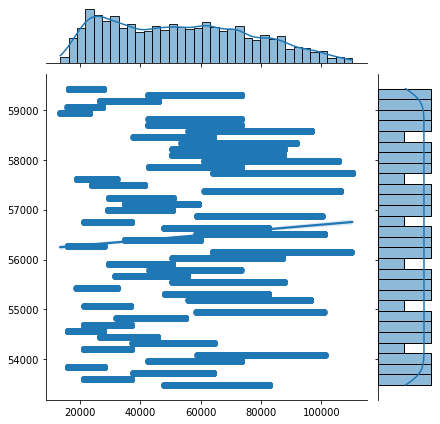

R2 score of  LinearRegression()  :  -0.013281570708200574


In [107]:
evaluate(lin,X_test_scale,y_test,y_predict_lr,result_L)

**ii) Evaluation metric for KNN classifier algorithm**

<Figure size 1440x720 with 0 Axes>

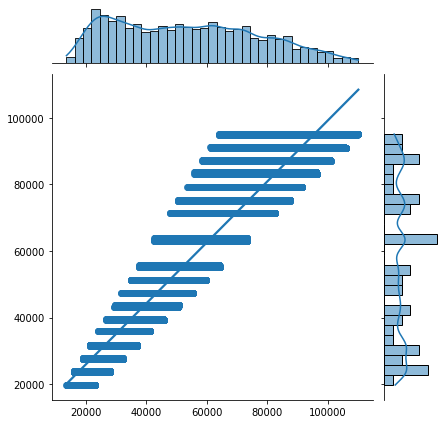

R2 score of  KNeighborsRegressor(n_neighbors=1)  :  0.8402128517696641


In [108]:
evaluate(knn,X_test_scale,y_test,y_predict_knn,result_K)

**iii) Evaluation metric for Decision Tree classifier algorithm**

<Figure size 1440x720 with 0 Axes>

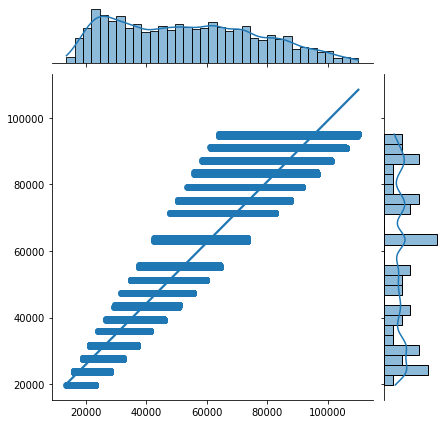

R2 score of  DecisionTreeRegressor(max_depth=24, random_state=97)  :  0.8402128517696641


In [109]:
evaluate(dt,X_test_scale,y_test,y_predict_dt,result_D)

In [110]:
from sklearn import tree

**iv)Evaluation metric for RandomForest classifier**

<Figure size 1440x720 with 0 Axes>

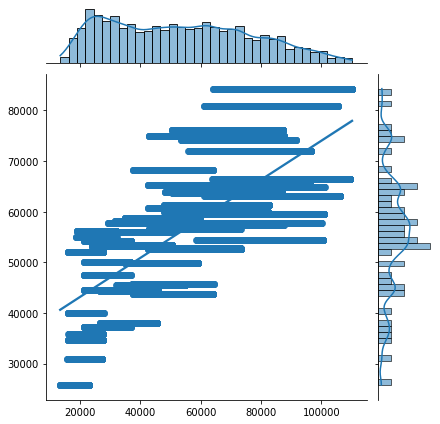

R2 score of  RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=40,
                      random_state=97)  :  0.46337611558465974


In [111]:
evaluate(rfr,X_test_scale,y_test,y_predict_rfr,result_R)

**v)Evaluation metric for Xgboost classifier**

<Figure size 1440x720 with 0 Axes>

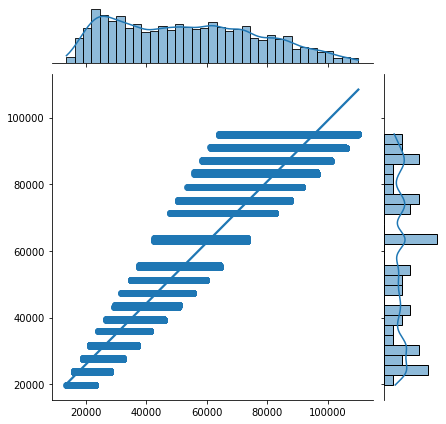

R2 score of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=97, ...)  :  0.8402128973535465


In [112]:
evaluate(Xgb,X_test_scale,y_test,y_predict_Xgb,result_X)

**vi) evaluation metric for Voting classifier**

<Figure size 1440x720 with 0 Axes>

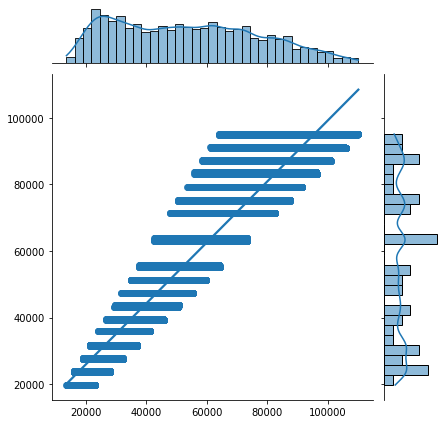

R2 score of  VotingRegressor(estimators=[('KNN', KNeighborsRegressor(n_neighbors=1)),
                            ('DT',
                             DecisionTreeRegressor(max_depth=24,
                                                   random_state=97)),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          g...None,
                                          grow_policy=None,
                                          importanc

In [113]:
evaluate(vot,X_test_scale,y_test,y_predict_vot,result_V)


**SCORING COMPARISON**

In [114]:
score=[score_L,score_K,score_D,score_R,score_X,score_V]
model=['Linear regression','KNN regression','Decision tree regression','RandomForest regression','XGboost regression','voting regression']
RESULT= pd.DataFrame({'model': model, 'score': score})
RESULT

,model,score
0,Linear regression,-0.013282
1,KNN regression,0.840213
2,Decision tree regression,0.840213
3,RandomForest regression,0.463376
4,XGboost regression,0.840213
5,voting regression,0.840213


**Model Deploying**

In [126]:
y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.47,n_estimators= 500,random_state=97,objective='reg:squarederror'),X_train, X_test, y_train, y_test,0.47)
     

for  0.47  value  Train Accuracy :  1.0 Val Accuracy : -1.519


In [130]:
import pickle

In [131]:
pickle.dump(Xgb,open('best_Xgb_model.pkl','wb'))

In [132]:
model=pickle.load(open('best_Xgb_model.pkl','rb'))
model.predict([[1,92,24,206,29,6,7,3,2016]])

array([23645.004], dtype=float32)

In [133]:
!pip install streamlit
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=8710d6f0d38338fb5c024cc8bc40bae436a802f40a9581

In [134]:
%%writefile app_idf.py

import numpy as np
import pickle
import pandas as pd
import streamlit as st
import datetime

model=pickle.load(open('best_Xgb_model.pkl','rb'))

def deploy():
  st.set_page_config(layout='wide')
  
  st.title('ITEM DEMAND FORECASTING')
  st.header('Enter the item Details')
  date=st.date_input('which date you want to Forecast :')
  item=st.number_input('which item you want to forecast:' , min_value=1,max_value=50)

  if st.button('Demand Forecast'):
    forecast=predict(date,item)
    forecast=np.round_(forecast,0)
    st.success(f'Demand of {item} Item at after 3 Months is : {forecast[0]}')

  
def predict(date,item):
  date=pd.to_datetime(date)
  dayofyear=date.dayofyear
  day=date.day
  week=date.week
  dayofweek=date.dayofweek
  quarter=date.quarter
  month=date.month
  year=date.year
  duration=(pd.to_datetime(date+pd.DateOffset(months=+3))-pd.to_datetime(date)).days
  prediction=model.predict([[item,duration,day,dayofyear,week,dayofweek,month,quarter,year]])
    
  return prediction
  

if __name__=='__main__':
  deploy()

Writing app_idf.py


In [135]:
!streamlit run app_idf.py & npx localtunnel --port 8501

[#######...........] \ extract:localtunnel: verb lock using /root/.npm/_locks/s


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.100.82:8501

npx: installed 22 in 6.809s
your url is: https://icy-needles-heal-34-83-100-82.loca.lt
  Stopping...
^C
